In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics as st
from IPython import display
from mpl_toolkits.mplot3d import Axes3D



In [91]:
img=cv2.imread('./imagefile/tryout/img_000.jpg')

#img_resize = cv2.resize(img, dsize=[1920,1080], fx=None, fy=None)

#cv2.imwrite(img_path,img)

# HSVに変換
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(RGB, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(hsv,cv2.CV_64F,1,0,ksize=5)

#plt.imshow(sobelx)
cv2.imwrite("./after/test.jpg",sobelx)

True

In [92]:
im_out = cv2.imread("./after/test.jpg")

# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
#plt.imshow(img_binary)

0 外接矩形の座標
[[ 715 1078]
 [ 731 1051]
 [ 739 1056]
 [ 723 1083]] 

1 外接矩形の座標
[[1827 1026]
 [1895 1026]
 [1895 1079]
 [1827 1079]] 

2 外接矩形の座標
[[1886  989]
 [1919  989]
 [1919 1079]
 [1886 1079]] 

3 外接矩形の座標
[[ 814  965]
 [ 851  963]
 [ 856 1078]
 [ 818 1080]] 

4 外接矩形の座標
[[  0 579]
 [ 12 579]
 [ 12 721]
 [  0 721]] 

5 外接矩形の座標
[[1131    0]
 [1137   -1]
 [1165   73]
 [1160   75]] 

6 外接矩形の座標
[[   0 1078]
 [   0    0]
 [1918    0]
 [1918 1078]] 

7 外接矩形の座標
[[1284 1059]
 [1284 1044]
 [1290 1044]
 [1290 1059]] 

8 外接矩形の座標
[[ 587 1038]
 [ 594 1035]
 [ 602 1052]
 [ 596 1055]] 

9 外接矩形の座標
[[ 355 1034]
 [ 381 1024]
 [ 384 1031]
 [ 357 1042]] 

10 外接矩形の座標
[[ 705 1025]
 [ 724 1022]
 [ 729 1052]
 [ 710 1055]] 

11 外接矩形の座標
[[ 384 1031]
 [ 384 1023]
 [ 398 1023]
 [ 398 1031]] 

12 外接矩形の座標
[[ 562  988]
 [ 577  984]
 [ 593 1050]
 [ 578 1054]] 

13 外接矩形の座標
[[ 486  991]
 [ 493  984]
 [ 514 1005]
 [ 507 1012]] 

14 外接矩形の座標
[[616 975]
 [626 973]
 [630 995]
 [619 997]] 

15 外接矩形の座標
[[497 978]
 [501 974]
 [5

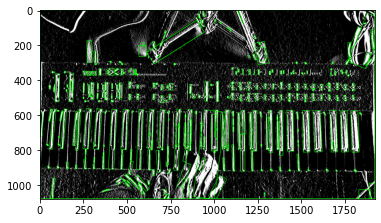

In [93]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda y: cv2.contourArea(y) > 50, contours))

ylen=[]

ID=0
for i in contours:
    y=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    #cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        y+=[r[1]]
        
    ylen+=[[max(min(y),0),min(max(y),1080)]]
    ID+=1

In [94]:
hst=[0]*1080
i=0
while i<len(ylen):
    j=ylen[i][0]
    while j<ylen[i][1]:
        hst[j]+=1
        j+=1
    i+=1

In [95]:
#疑似的に積分し、最も輪郭が多い範囲を取得
i=0
hst+=[-1]
menseki=[]
ykenban=[]
while i<1080:
    sekibun=0
    while hst[i]<20 and hst[i]!=-1:
        i+=1
    ystart=i
    while hst[i]>=20 and hst[i]!=-1:
        sekibun+=hst[i]
        i+=1
    yend=i
    ykenban+=[[ystart,yend]]
    menseki+=[sekibun]
print(ykenban)
print(menseki)
ind=menseki.index(max(menseki))
print(ykenban[ind])

[[346, 370], [419, 460], [478, 512], [513, 517], [572, 812], [843, 860], [863, 867], [868, 921], [1080, 1080]]
[719, 1434, 1091, 82, 9034, 342, 80, 1198, 0]
[572, 812]


(1080, 1920)


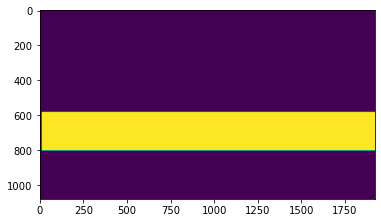

In [96]:
# マスク用単一色画像を作成



#若干の調整
yy = math.floor(1.5*(ykenban[ind][1]-ykenban[ind][0])) 
#height = yy*5
height = ykenban[ind][1]-ykenban[ind][0]


imgMask = np.full((1, 1, 1), 1, dtype=np.uint8)
imgMask_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

imgMask_resize2 = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

print(imgMask_resize.shape)

# マスク範囲を四角形で描画
boxFromX = 0 #マスク範囲開始位置 X座標
boxFromY = ykenban[ind][0]  #マスク範囲開始位置 Y座標
boxToX = 1980 #マスク範囲終了位置 X座標
boxToY = boxFromY + height #マスク範囲終了位置 Y座標

#cv2.rectangle(imgMask_resize, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

cv2.rectangle(imgMask_resize , (boxFromX+10, boxFromY+10), (boxToX-10, boxToY-10),(255), cv2.FILLED)
cv2.rectangle(imgMask_resize2, (boxFromX+10, boxFromY+10), (boxToX-10, boxFromY+yy-10),(255), cv2.FILLED)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", imgMask_resize)    #黒鍵の長さ
cv2.imwrite("./mask/testMaskImg2.jpg", imgMask_resize2)  #白鍵の長さ
plt.imshow(imgMask_resize)
#plt.imshow(imgMask_resize2)

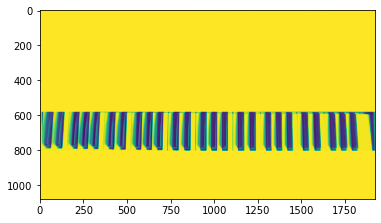

In [97]:
im_1 = cv2.imread('./imagefile/tryout/img_000.jpg', cv2.IMREAD_COLOR)
im_1 = cv2.cvtColor(im_1,cv2.COLOR_BGR2GRAY)
imgMask_resize_not = cv2.bitwise_not(imgMask_resize)
im_out = cv2.bitwise_or(im_1, imgMask_resize_not)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

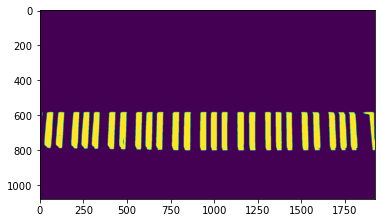

In [98]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
#img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(im_out,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[1768  584]
 [1807  581]
 [1821  799]
 [1782  801]] 

1 外接矩形の座標
[[1709  584]
 [1748  581]
 [1760  799]
 [1722  801]] 

2 外接矩形の座標
[[1852  585]
 [1909  571]
 [1963  788]
 [1907  802]] 

3 外接矩形の座標
[[1650  583]
 [1688  581]
 [1700  799]
 [1662  801]] 

4 外接矩形の座標
[[1561  583]
 [1599  581]
 [1608  799]
 [1570  801]] 

5 外接矩形の座標
[[1495  583]
 [1533  581]
 [1541  800]
 [1504  801]] 

6 外接矩形の座標
[[1409  583]
 [1442  582]
 [1446  800]
 [1413  801]] 

7 外接矩形の座標
[[1349  583]
 [1382  582]
 [1385  800]
 [1352  801]] 

8 外接矩形の座標
[[1288  583]
 [1322  582]
 [1325  800]
 [1291  801]] 

9 外接矩形の座標
[[1197  583]
 [1233  582]
 [1235  800]
 [1198  801]] 

10 外接矩形の座標
[[1131  583]
 [1168  583]
 [1168  801]
 [1131  801]] 

11 外接矩形の座標
[[1041  583]
 [1075  583]
 [1075  801]
 [1041  801]] 

12 外接矩形の座標
[[ 979  800]
 [ 979  582]
 [1014  582]
 [1014  800]] 

13 外接矩形の座標
[[915 800]
 [918 582]
 [954 583]
 [951 801]] 

14 外接矩形の座標
[[822 800]
 [825 582]
 [864 583]
 [860 801]] 

15 外接矩形の座標
[[755 800]
 [759 582]
 [7

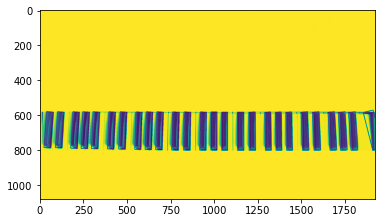

In [99]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [100]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [101]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[22, 88, 176, 235, 295, 386, 451, 543, 602, 663, 755, 822, 915, 979, 1041, 1131, 1197, 1288, 1349, 1409, 1495, 1561, 1650, 1709, 1768, 1852]
[77, 138, 226, 284, 342, 433, 498, 585, 646, 707, 798, 864, 954, 1014, 1075, 1168, 1235, 1325, 1385, 1446, 1541, 1608, 1700, 1760, 1821, 1963]


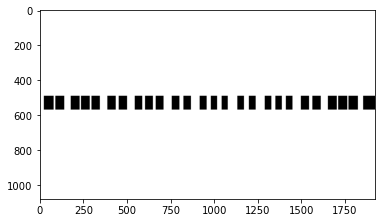

In [102]:
i=0
white = cv2.imread('./mask/white.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 568),
              (xright[i], 490),
              (0, 0, 0),
              thickness=-1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1
plt.imshow(base)

In [103]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [104]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

[[0, 22], [77, 88], [138, 176], [226, 235], [284, 295], [342, 386], [433, 451], [498, 543], [585, 602], [646, 663], [707, 755], [798, 822], [864, 915], [954, 979], [1014, 1041], [1075, 1131], [1168, 1197], [1235, 1288], [1325, 1349], [1385, 1409], [1446, 1495], [1541, 1561], [1608, 1650], [1700, 1709], [1760, 1768], [1821, 1852], [1963, 1920]]


In [105]:
mean=st.mean(xleft)-st.mean(xright)


In [106]:



#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>mean:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 22], [77, 88], [138, 157], [157, 176], [226, 235], [284, 295], [342, 364], [364, 386], [433, 451], [498, 520], [521, 543], [585, 602], [646, 663], [707, 731], [731, 755], [798, 822], [864, 889], [890, 915], [954, 979], [1014, 1041], [1075, 1103], [1103, 1131], [1168, 1182], [1183, 1197], [1235, 1261], [1262, 1288], [1325, 1349], [1385, 1409], [1446, 1470], [1471, 1495], [1541, 1561], [1608, 1629], [1629, 1650], [1700, 1709], [1760, 1768], [1821, 1836], [1837, 1852], [1963, 1920]]


[[0, 22], [77, 88], [138, 157], [157, 176], [226, 235], [284, 295], [342, 364], [364, 386], [433, 451], [498, 520], [521, 543], [585, 602], [646, 663], [707, 731], [731, 755], [798, 822], [864, 889], [890, 915], [954, 979], [1014, 1041], [1075, 1103], [1103, 1131], [1168, 1182], [1183, 1197], [1235, 1261], [1262, 1288], [1325, 1349], [1385, 1409], [1446, 1470], [1471, 1495], [1541, 1561], [1608, 1629], [1629, 1650], [1700, 1709], [1760, 1768], [1821, 1836], [1837, 1852], [1963, 1920]]


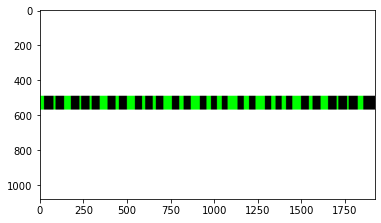

In [107]:
i=0

base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,255,0),
              thickness=-1,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [108]:
#音の高さを検出
n=0 #右から何番目かを入力　左端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
tensin=0
k=1
while i>=0:
    tensin+=nanabit[i]*k
    k*=2
    i-=1

print(tensin)

77 22
138 88
157 157
284 235
342 295
364 364
[0, 0, 1, 1, 0, 0, 0]
24


In [109]:
if tensin==24:hstart=0
if tensin==51:hstart=1
if tensin==102:hstart=2
if tensin==12:hstart=3
if tensin==27:hstart=4
if tensin==54:hstart=5
if tensin==108:hstart=6
print(hstart)


0


In [110]:
#オクターブ
n=2

In [111]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)]
    i+=1
print(hakkendoremi)

['C2', 'D2', 'E2', 'F2', 'G2', 'A2', 'B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6', 'A6', 'B6', 'C7', 'D7', 'E7']


True

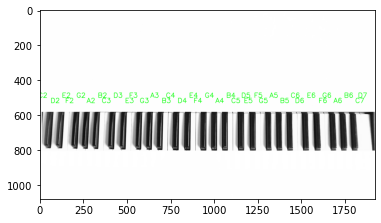

In [112]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [113]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

0 0


In [114]:
sharp=["C#","D#","F#","G#","A#"]
if hstart==6:
    n+=1
i=0
kokkendoremi=[]
while i<len(kokken):
    kokkendoremi+=[str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)]
    i+=1
print(kokkendoremi)

['C#2', 'D#2', 'F#2', 'G#2', 'A#2', 'C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6', 'F#6', 'G#6', 'A#6', 'C#7']


True

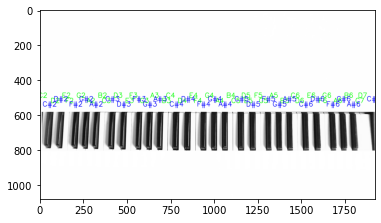

In [115]:
i=0
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [134]:
num = 0
hakkenfocus = []
mask = cv2.imread('./mask/kenbanmask.jpg')
while(1):
    
    img_number = num
    if img_number < 100:
        if img_number < 10:
            img_number = "0"+str(img_number)
        img_number = "0"+str(img_number)

    img1 = cv2.imread('./imagefile/tryout/img_'+str(img_number)+'.jpg')

    if img1 is None:
        break

    i=0
    sumlist = []
    while i<len(hakken):
        img2 = img1[boxFromY+10:boxToY-10,hakken[i][0]+5:hakken[i][1]-5]
        #sumlist += [np.ndarray.sum(img2.ravel())]
        sumlist += [np.average(img2.ravel(), axis = None, weights = None, returned = False)]
        i+=1

    hakkenfocus += [sumlist]

    num += 1

c:\Users\user\anaconda3\envs\py39\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [135]:
#転置
hakkenfocus_t = np.array(hakkenfocus).T.tolist()

In [ ]:
#ミとシを特定しておく

k = 0
mi_and_si = []
for i in hakkendoremi:
    if (i[0] == 'E') or (i[0] == 'B'):mi_and_si += [k]

    k += 1

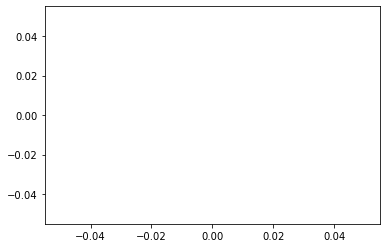

In [160]:
import statistics as st

num=0
hakkenrange = []

finaldata = []

for i in hakkenfocus_t:
    img_number = num
    if img_number < 100:
        if img_number < 10:
            img_number = "0"+str(img_number)
        img_number = "0"+str(img_number)


    #ミとシ、その他で閾値を変える
    if num in mi_and_si:
        hakkenborder = hakkenfocus_t[num][0]*0.95
        x = [hakkenborder]*306
    else:
        hakkenborder = hakkenfocus_t[num][0]*0.9
        x = [hakkenborder]*306

    ccc = []
    for j in i:
        if j < hakkenborder:ccc += [1]
        else: ccc += [0]
    finaldata += [ccc]
    
    plt.clf()
    plt.plot(i)
    plt.plot(x)
    plt.savefig('./imagefile/plt/img_'+str(img_number)+'.jpg')

    hakkenrange += [max(i)-min(i)]

    num+=1
    



In [164]:
#転置
finaldata_t = np.array(finaldata).T.tolist()

for i in range(0,len(finaldata_t)):
    print(finaldata_t[i])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0